<a href="https://colab.research.google.com/github/typjohnson/MLA_TPJ/blob/main/MLA1_TPJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning Assignment 1

Ty Johnson

CS430

Machine Learning in the Cloud

# Initial Dataset Exploration

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#reading the dataset from the drive and saving to dataframe
df = pd.read_csv('/content/drive/MyDrive/Pandas Weather Data/weather_2012.csv')

In [ ]:
#finding the first five rows of the dataset
df.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [ ]:
#finding the last five rows of the dataset
df.tail()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,2012-12-31 23:00:00,0.0,-2.1,86,30,11.3,99.89,Snow


In [ ]:
#displaying a sample of five random rows in the dataset
df.sample(5)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
5711,2012-08-25 23:00:00,24.0,18.0,69,9,25.0,101.83,Clear
5364,2012-08-11 12:00:00,26.1,20.6,72,9,24.1,100.58,Mostly Cloudy
7615,2012-11-13 07:00:00,5.4,2.3,80,30,24.1,101.78,Cloudy
3631,2012-05-31 07:00:00,13.1,8.9,76,15,24.1,100.61,Rain Showers
3439,2012-05-23 07:00:00,14.8,10.9,77,11,24.1,101.05,Cloudy


In [ ]:
#listing all columns from the dataset
df.columns

Index(['date_time', 'temp_f', 'temp_c', 'dew_point', 'relative_humidity',
       'wind_speed', 'visibility', 'pressure', 'weather'],
      dtype='object')

In [ ]:
#renaming all columns with array of new names
df.columns = ['date_time', 'temp_c', 'dew_point', 'relative_humidity', 'wind_speed', 'visibility', 'pressure', 'weather']

In [ ]:
#getting summary statistics for numerical columns
df.describe()

,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [ ]:
#creating a temp farenheit column based on celsius
df['temp_f'] = (df['temp_c'] * (9/5)) +32

In [ ]:
temp_f = df.pop('temp_f')
#inserting temp_f in first position, before temp_c
df.insert(1, 'temp_f', temp_f)

In [ ]:
df.head()

,date_time,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure,weather,temp_f
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,28.76
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,28.76
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",28.76
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",29.30
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,29.30


In [ ]:
#finding the datatypes of each column in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_time          8784 non-null   object 
 1   temp_f             8784 non-null   float64
 2   temp_c             8784 non-null   float64
 3   dew_point          8784 non-null   float64
 4   relative_humidity  8784 non-null   int64  
 5   wind_speed         8784 non-null   int64  
 6   visibility         8784 non-null   float64
 7   pressure           8784 non-null   float64
 8   weather            8784 non-null   object 
dtypes: float64(5), int64(2), object(2)
memory usage: 617.8+ KB


In [ ]:
#converting the date_time column to actual date/time datatype
df['date_time']= pd.to_datetime(df['date_time'])
#double checking
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date_time          8784 non-null   datetime64[ns]
 1   temp_f             8784 non-null   float64       
 2   temp_c             8784 non-null   float64       
 3   dew_point          8784 non-null   float64       
 4   relative_humidity  8784 non-null   int64         
 5   wind_speed         8784 non-null   int64         
 6   visibility         8784 non-null   float64       
 7   pressure           8784 non-null   float64       
 8   weather            8784 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 617.8+ KB


In [ ]:
#creating a pandas series by getting average temp in each month
monthly_avg = df.groupby(df['date_time'].dt.month)['temp_f'].mean()
monthly_avg

,temp_f
date_time,
1,18.731290
2,24.395000
3,37.618226
4,44.616750
5,61.227984
6,68.241250
7,73.022097
8,72.102742
9,61.672000


In [ ]:
#making sure the type is a series
monthly_avg.info()

<class 'pandas.core.series.Series'>
Index: 12 entries, 1 to 12
Series name: temp_f
Non-Null Count  Dtype  
--------------  -----  
12 non-null     float64
dtypes: float64(1)
memory usage: 144.0 bytes


## Visualizations

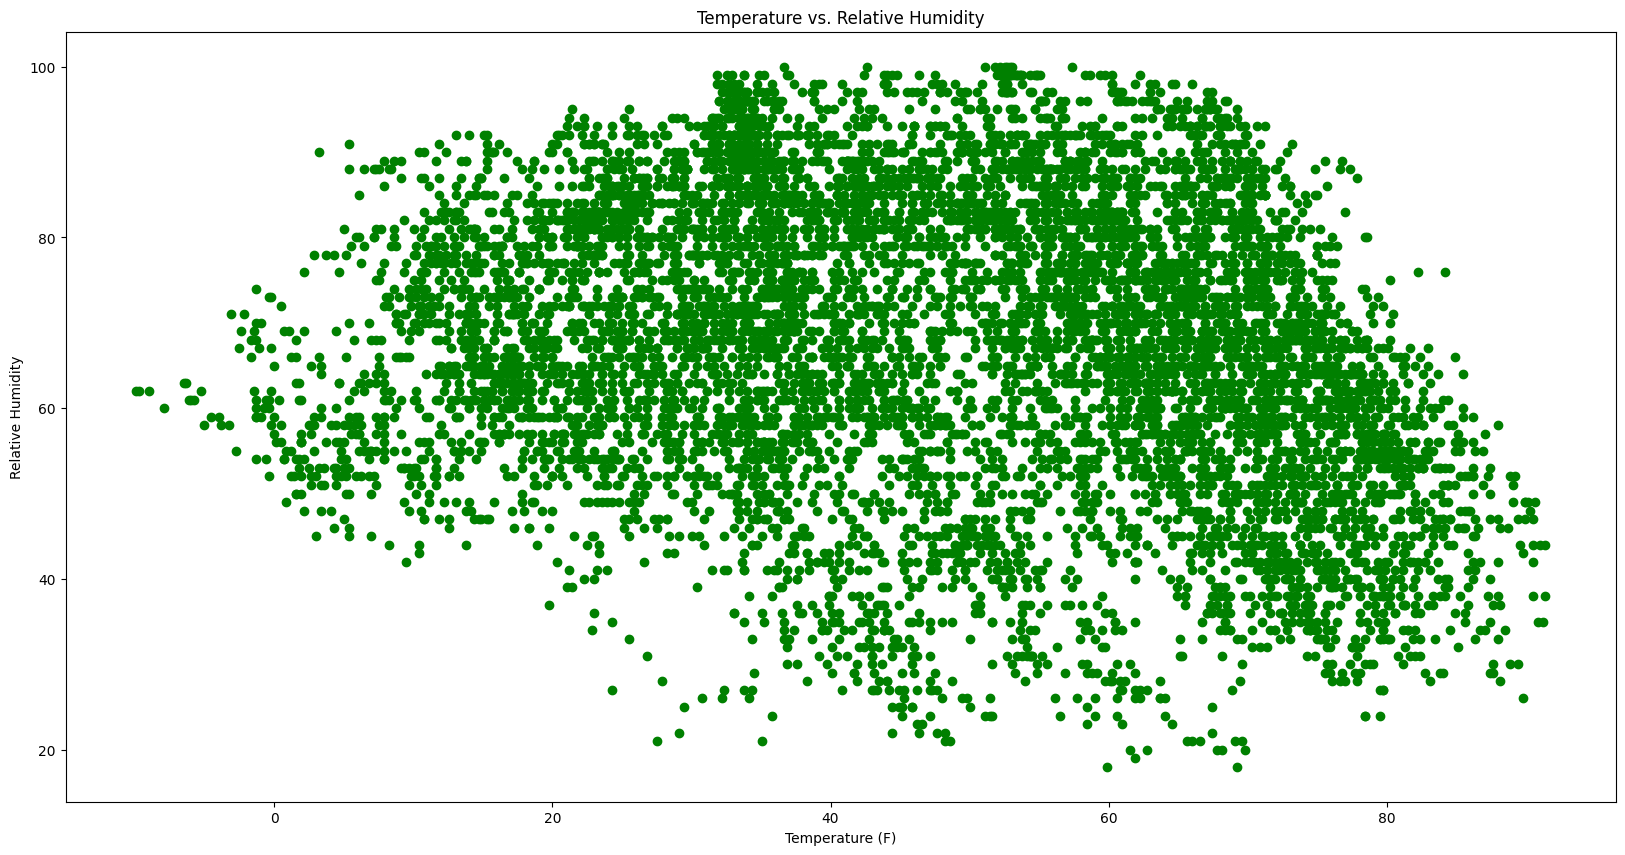

In [ ]:
#creating a scatterplot to look at temperature vs relative humidity
plt.figure(figsize=(20,10))
plt.scatter(df['temp_f'], df['relative_humidity'], color='green')
plt.xlabel('Temperature (F)')
plt.ylabel('Relative Humidity')
plt.title('Temperature vs. Relative Humidity')
plt.show()

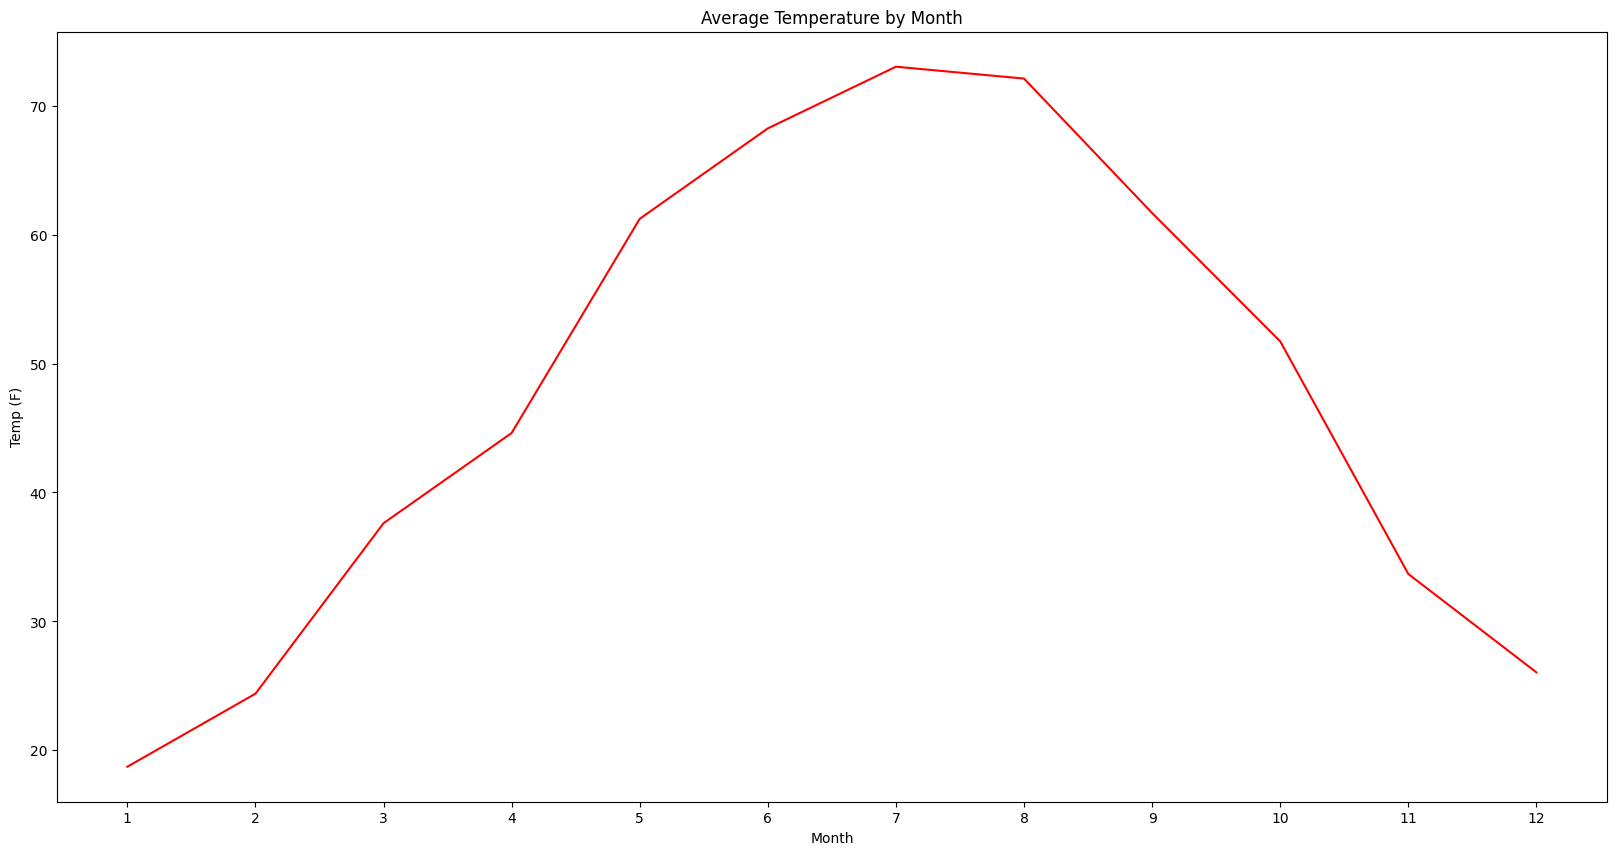

In [ ]:
#creating a linechart to look at the average temp by month
plt.figure(figsize=(20,10))
plt.plot(monthly_avg.index, monthly_avg.values, color='red')
plt.xlabel('Month')
#using numpy to assign 12 ticks on x-axis
plt.xticks(ticks=np.arange(1, 13))
plt.ylabel('Temp (F)')
plt.title('Average Temperature by Month')
plt.show()

<Axes: >

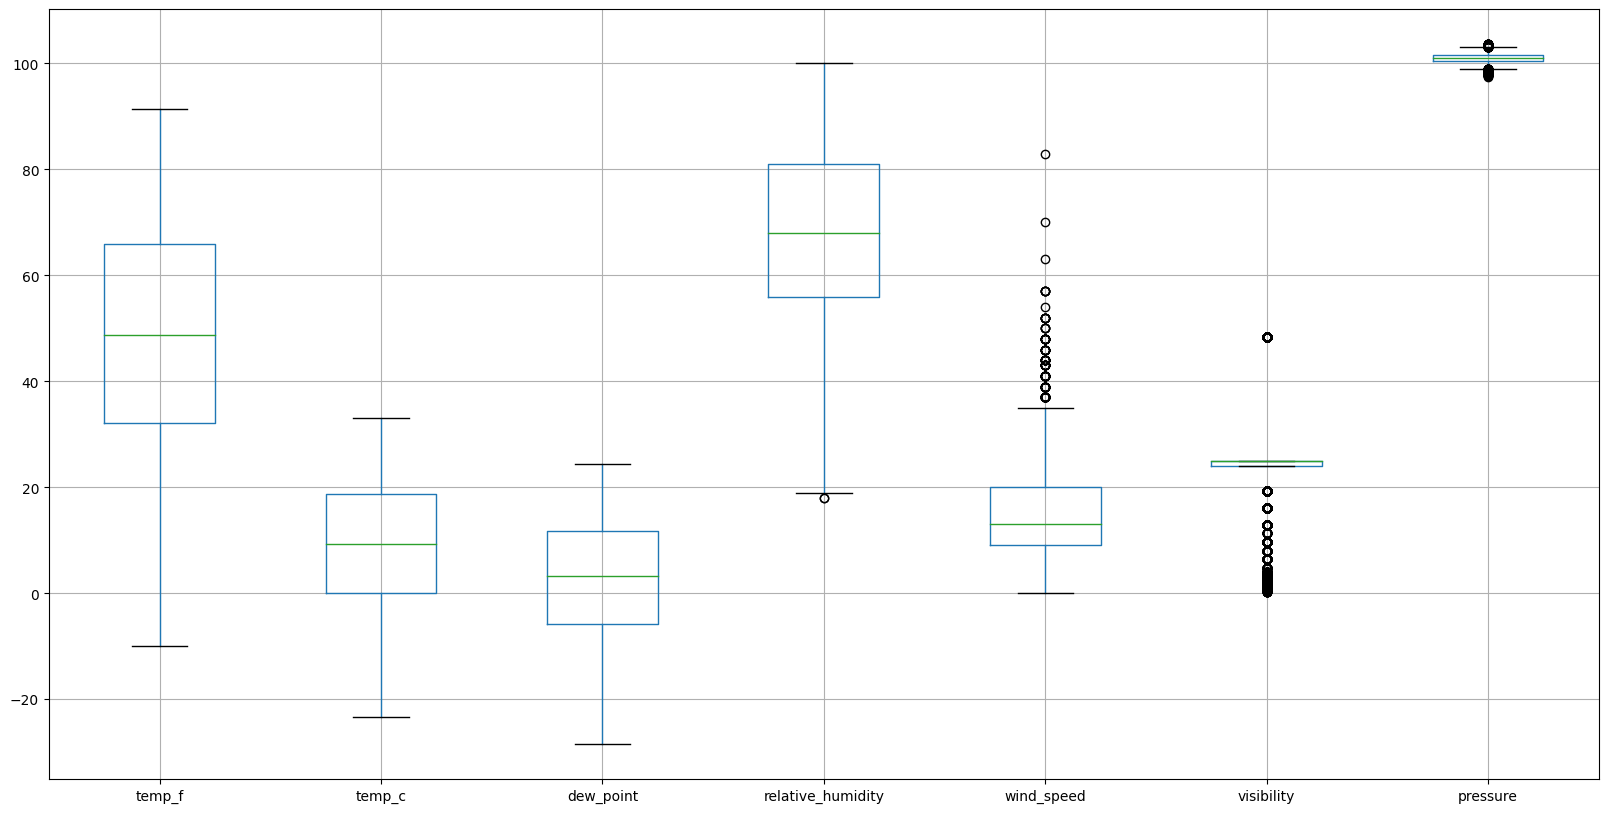

In [ ]:
df.boxplot(figsize=(20,10))